# Linear Regression And Logistic Regression Model

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [6]:
df = pd.read_csv('../safetronics/Final Dataset.csv')
df.set_index('Patient ID', inplace=True)
df.head(5)

,Heart Rate,Body Temperature,Oxygen Saturation,Age,Gender,Weight,Height (m),HRV,BMI,Risk Category
Patient ID,,,,,,,,,,
1,60,36.861707,95.702046,37,0,91.541618,1.679351,0.121033,32.459031,0
2,63,36.511633,96.689413,77,1,50.704921,1.992546,0.117062,12.771246,0
3,63,37.052049,98.508265,68,0,90.316760,1.770228,0.053200,28.821069,1
4,99,36.654748,95.011801,41,0,96.006188,1.833629,0.064475,28.554611,0
5,69,36.975098,98.623792,25,0,56.020006,1.866419,0.118484,16.081438,0


In [ ]:
df['Risk Category'].value_counts(normalize=True)    # normalize give the result in percentage

Risk Category
0    0.525522
1    0.474478
Name: proportion, dtype: float64

## Linear Regression Model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [9]:
# select numeric feature although it is
num_cols = df.select_dtypes(include=['number']).columns.to_list()
if 'Patient ID' in num_cols:
    num_cols.remove('Patient ID')
if 'Risk Category' in num_cols:
    num_cols.remove('Risk Category')

In [10]:
num_cols

['Heart Rate',
 'Body Temperature',
 'Oxygen Saturation',
 'Age',
 'Gender',
 'Weight',
 'Height (m)',
 'HRV',
 'BMI']

In [11]:
# defining X, y from dataframe
X = df[num_cols]
y = df['Risk Category']
# print(X.head())
# print(y.head())

In [12]:
X.head()

,Heart Rate,Body Temperature,Oxygen Saturation,Age,Gender,Weight,Height (m),HRV,BMI
Patient ID,,,,,,,,,
1,60,36.861707,95.702046,37,0,91.541618,1.679351,0.121033,32.459031
2,63,36.511633,96.689413,77,1,50.704921,1.992546,0.117062,12.771246
3,63,37.052049,98.508265,68,0,90.316760,1.770228,0.053200,28.821069
4,99,36.654748,95.011801,41,0,96.006188,1.833629,0.064475,28.554611
5,69,36.975098,98.623792,25,0,56.020006,1.866419,0.118484,16.081438


In [20]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)   # stratify for same ratio/proportion of label

In [21]:
y_train.shape

(160016,)

In [19]:
# making y_train a 1-D array
y_train = y_train.to_numpy().ravel()    # ravel transforms a multi-dimensional array into continuos one-dimensional array

In [16]:
y_train.shape

(160016,)

In [22]:
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (160016, 9), X_test: (40004, 9), y_train: (160016,), y_test: (40004,)


In [23]:
# scale the features
# fit on training data only
scaler = StandardScaler()
scaler.fit(X_train)

# transform both train and test using the same scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# fit in the linear model
lin = LinearRegression()
lin.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
# predection
y_pred = lin.predict(X_test)
print("Evaluation:")
print("r2 score: ",r2_score(y_test, y_pred))
print("MSE: ",mean_squared_error(y_test, y_pred))

Evaluation:
r2 score:  0.41075620352952724
MSE:  0.14692711845481624


Here the goodness of fit of the model is low and the mse is high

In [27]:
# logistic regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=2000, random_state=42)
log.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [29]:
# Evaluation
y_pred_log = log.predict(X_test)
# y_pred_log = y_pred_log.to_numpy().ravel()
print(f"LogisticRegression Evaluation")
print("Accuracy: ",accuracy_score(y_test, y_pred_log))    # ratio of proportion of correct predections to total predection
print("precision_score",precision_score(y_test, y_pred_log, zero_division=0)) # ration of TP to the models that are classified as positive TP/(TP + FP)
print("Recall: ", recall_score(y_test, y_pred_log, zero_division=0))   # TP/(TP + FN)
print("F1: ",f1_score(y_test, y_pred_log, zero_division=0))            # 2*(precision*recall)/(precision + recall)

LogisticRegression Evaluation
Accuracy:  0.8161433856614339
precision_score 0.8020054031587698
Recall:  0.813286971181708
F1:  0.807606790656308


In [32]:
cfn_matrix = confusion_matrix(y_test, y_pred_log)
print("Cpnfusion Matrix: ", cfn_matrix)

Cpnfusion Matrix:  [[17212  3811]
 [ 3544 15437]]


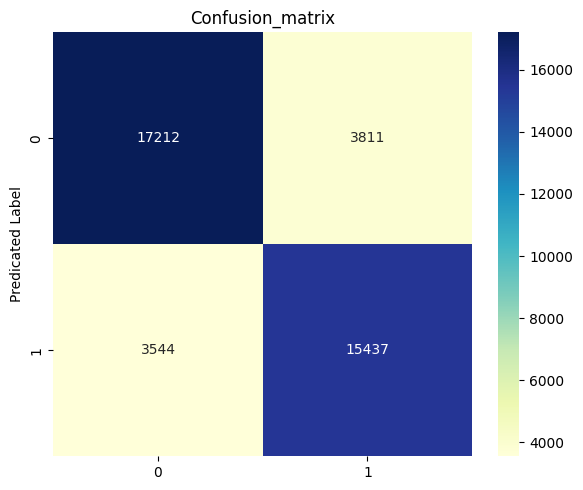

In [ ]:
# Visualization  using heatmap
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0,1]  # name of classes
plt.figure(figsize=(6,5))
sns.heatmap(pd.DataFrame(cfn_matrix),      # convert numpy array to dataframe
            annot=True,                    # write number inside the every box
            cmap="YlGnBu",                 # color map yellow, Blue, Green
            fmt='g',                       # annotations as green
            xticklabels=class_names,       # labels the x-axis with class name
            yticklabels=class_names
            )
plt.title('Confusion_matrix')
plt.ylabel('Actual Label')
plt.ylabel('Predicated Label')
plt.tight_layout()
plt.show()

In [35]:
# saving the model
import joblib
joblib.dump(log, "LogisticRegression_model.sav")
joblib.dump(scaler, "scaler.sav")
joblib.dump(num_cols, "feature_names.sav")

['feature_names.sav']